In [19]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
import os
os.environ['PYTHONPATH'] = '/env/python'

In [28]:
%cd '/content/gdrive/My Drive/emotion-detect'

/content/gdrive/My Drive/emotion-detect


In [6]:
! pip install -q kaggle

In [11]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"killig22110118td3110","key":"491f5f6ff59e3bbe95eaf0eb9fd1f23e"}'}

In [12]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [13]:
! chmod 600 ~/.kaggle/kaggle.json

In [15]:
! kaggle datasets list

ref                                                          title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance         Student Habits vs Academic Performance                  19512  2025-04-12 10:49:08.663000          15945        283  1.0              
fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid      Heart Attack Dataset                                    16250  2025-04-30 21:58:22.740000           2474         42  1.0              
khushikyad001/impact-of-screen-time-on-mental-health         Impact of Screen Time on Mental Health                  64873  2025-04-20 18:01:47.570000           1434         28  1.0              
khushikyad001/screen

In [16]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0


In [23]:
import zipfile
import os

zip_path = "archive.zip"
extract_to = "fer2013"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Đã giải nén xong!")


✅ Đã giải nén xong!


In [25]:
!pip install tensorflow

In [31]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Đường dẫn dataset
train_dir = '/content/gdrive/My Drive/emotion-detect/fer2013/train'
val_dir   = '/content/gdrive/My Drive/emotion-detect/fer2013/test'

# ImageDataGenerator
train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32
)

val_data = val_gen.flow_from_directory(
    val_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32
)

# Model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Checkpoint (lưu lại model tốt nhất)
checkpoint = ModelCheckpoint(
    '/content/gdrive/MyDrive/emotion-detect/emotion_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Train
model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    callbacks=[checkpoint]
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.2942 - loss: 1.7431
Epoch 1: val_accuracy improved from -inf to 0.42240, saving model to /content/gdrive/MyDrive/emotion-detect/emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 159s 171ms/step - accuracy: 0.2942 - loss: 1.7430 - val_accuracy: 0.4224 - val_loss: 1.4831
Epoch 2/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.4309 - loss: 1.4771
Epoch 2: val_accuracy improved from 0.42240 to 0.45347, saving model to /content/gdrive/MyDrive/emotion-detect/emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 99s 110ms/step - accuracy: 0.4310 - loss: 1.4770 - val_accuracy: 0.4535 - val_loss: 1.4367
Epoch 3/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.4739 - loss: 1.3727
Epoch 3: val_accuracy improved from 0.45347 to 0.48495, saving model to /content/gdrive/MyDrive/emotion-detect/emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 102s 114ms/step - accuracy: 0.4739 - loss: 1.3727 - val_accuracy: 0.4850 - val_loss: 1.3555
Epoch 4/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.4998 - loss: 1.3094
Epoch 4: val_accuracy improved from 0.48495 to 0.50613, saving model to /content/gdrive/MyDrive/emotion-detect/emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 97s 108ms/step - accuracy: 0.4998 - loss: 1.3094 - val_accuracy: 0.5061 - val_loss: 1.2822
Epoch 5/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5243 - loss: 1.2399
Epoch 5: val_accuracy did not improve from 0.50613
898/898 ━━━━━━━━━━━━━━━━━━━━ 100s 112ms/step - accuracy: 0.5243 - loss: 1.2399 - val_accuracy: 0.5017 - val_loss: 1.2908
Epoch 6/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5441 - loss: 1.1968
Epoch 6: val_accuracy improved from 0.50613 to 0.51254, saving model to /content/gdrive/MyDrive/emotion-detect/emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 100s 111ms/step - accuracy: 0.5441 - loss: 1.1968 - val_accuracy: 0.5125 - val_loss: 1.2811
Epoch 7/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5588 - loss: 1.1432
Epoch 7: val_accuracy improved from 0.51254 to 0.51923, saving model to /content/gdrive/MyDrive/emotion-detect/emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 98s 109ms/step - accuracy: 0.5588 - loss: 1.1432 - val_accuracy: 0.5192 - val_loss: 1.2447
Epoch 8/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5897 - loss: 1.0879
Epoch 8: val_accuracy improved from 0.51923 to 0.52870, saving model to /content/gdrive/MyDrive/emotion-detect/emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 101s 112ms/step - accuracy: 0.5897 - loss: 1.0879 - val_accuracy: 0.5287 - val_loss: 1.2494
Epoch 9/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6058 - loss: 1.0340
Epoch 9: val_accuracy did not improve from 0.52870
898/898 ━━━━━━━━━━━━━━━━━━━━ 97s 108ms/step - accuracy: 0.6057 - loss: 1.0340 - val_accuracy: 0.5269 - val_loss: 1.2654
Epoch 10/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6215 - loss: 0.9885
Epoch 10: val_accuracy did not improve from 0.52870
898/898 ━━━━━━━━━━━━━━━━━━━━ 98s 109ms/step - accuracy: 0.6215 - loss: 0.9885 - val_accuracy: 0.5286 - val_loss: 1.2841
Epoch 11/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6423 - loss: 0.9395
Epoch 11: val_accuracy improved from 0.52870 to 0.53051, saving model to /content/gdrive/MyDrive/emotion-detect/emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 97s 108ms/step - accuracy: 0.6422 - loss: 0.9395 - val_accuracy: 0.5305 - val_loss: 1.2890
Epoch 12/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6624 - loss: 0.8935
Epoch 12: val_accuracy did not improve from 0.53051
898/898 ━━━━━━━━━━━━━━━━━━━━ 98s 109ms/step - accuracy: 0.6623 - loss: 0.8936 - val_accuracy: 0.5274 - val_loss: 1.3467
Epoch 13/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6731 - loss: 0.8529
Epoch 13: val_accuracy did not improve from 0.53051
898/898 ━━━━━━━━━━━━━━━━━━━━ 101s 113ms/step - accuracy: 0.6731 - loss: 0.8530 - val_accuracy: 0.5288 - val_loss: 1.3458
Epoch 14/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6892 - loss: 0.8099
Epoch 14: val_accuracy improved from 0.53051 to 0.53204, saving model to /content/gdrive/MyDrive/emotion-detect/emotion_model.h5


898/898 ━━━━━━━━━━━━━━━━━━━━ 98s 109ms/step - accuracy: 0.6892 - loss: 0.8099 - val_accuracy: 0.5320 - val_loss: 1.4167
Epoch 15/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.7120 - loss: 0.7436
Epoch 15: val_accuracy did not improve from 0.53204
898/898 ━━━━━━━━━━━━━━━━━━━━ 99s 110ms/step - accuracy: 0.7120 - loss: 0.7436 - val_accuracy: 0.5298 - val_loss: 1.4442


Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step
📋 Classification Report:
              precision    recall  f1-score   support

       angry       0.45      0.41      0.43       958
     disgust       0.68      0.31      0.42       111
        fear       0.36      0.36      0.36      1024
       happy       0.72      0.73      0.73      1774
     neutral       0.49      0.50      0.49      1233
         sad       0.39      0.43      0.41      1247
    surprise       0.71      0.70      0.71       831

    accuracy                           0.53      7178
   macro avg       0.54      0.49      0.51      7178
weighted avg       0.53      0.53      0.53      7178



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


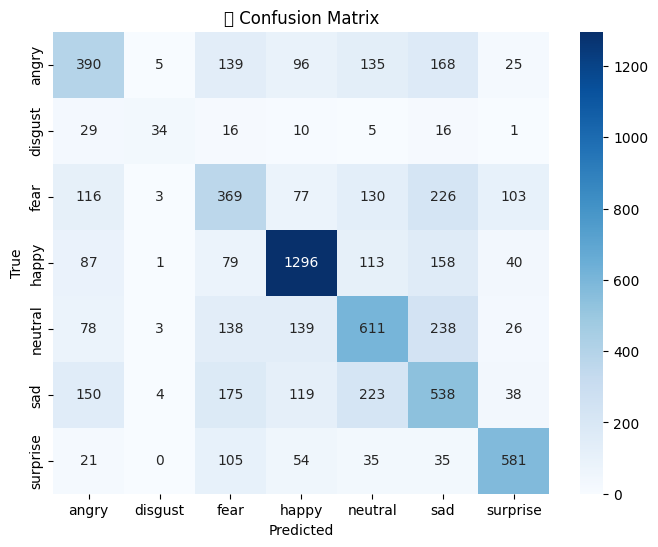

In [39]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load lại model nếu cần
from tensorflow.keras.models import load_model
model = load_model('/content/gdrive/MyDrive/emotion-detect/emotion_model.h5')

# Tạo generator test lại để predict
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = '/content/gdrive/My Drive/emotion-detect/fer2013/test'

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32,
    shuffle=False  # 💡 Rất quan trọng để khớp label
)

# Predict toàn bộ tập test
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)
y_true = test_gen.classes
class_names = list(test_gen.class_indices.keys())

# === Classification report ===
print("📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# === Confusion matrix ===
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("📊 Confusion Matrix")
plt.show()
